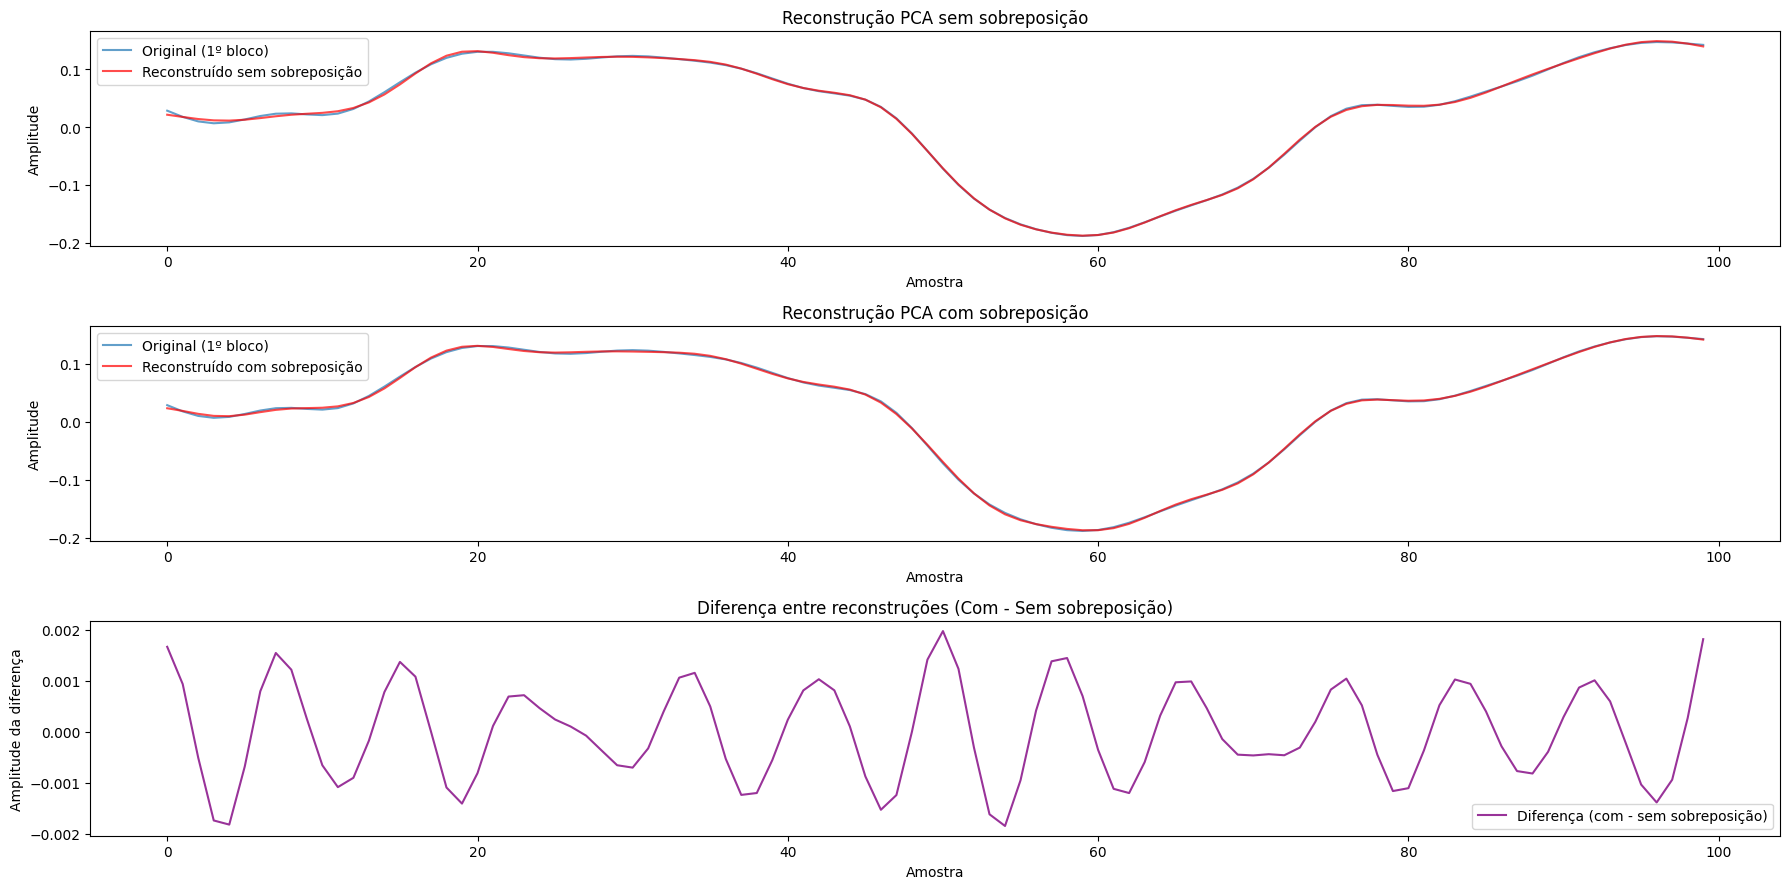

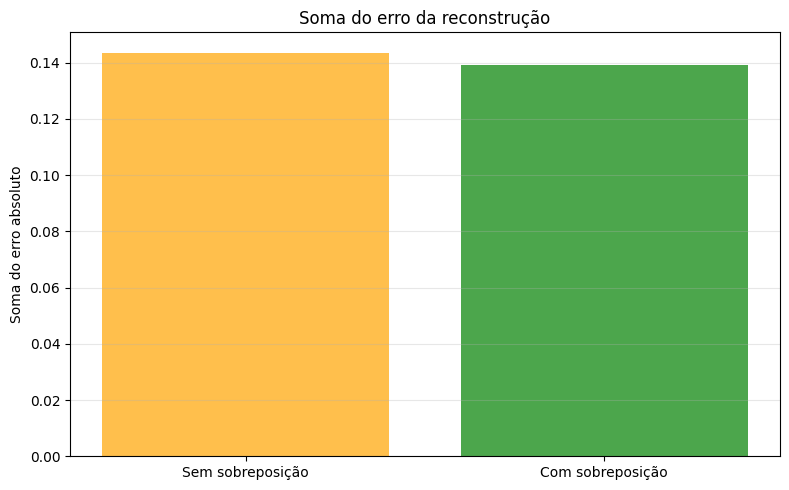

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import librosa

# === 1. Carregar música entre 45s e 47s ===
arquivo = '13 - Impatient.wav'
offset = 45.0      # começa em 45s
duration = 2.0     # 2 segundos (até 47s)
audio, sr = librosa.load(arquivo, sr=None, mono=True, offset=offset, duration=duration)

# Parâmetros
frame_size = 100
hop_length = 80
n_components = 25

# === 2. Função para dividir em quadros ===
def frame_audio(signal, frame_size, hop_length):
    n_frames = 1 + (len(signal) - frame_size) // hop_length
    frames = np.zeros((n_frames, frame_size))
    for i in range(n_frames):
        start = i * hop_length
        frames[i, :] = signal[start:start+frame_size]
    return frames

# Criar quadros
frames_no_overlap = frame_audio(audio, frame_size, frame_size)
frames_overlap = frame_audio(audio, frame_size, hop_length)

# === 3. PCA sem sobreposição ===
pca_no = PCA(n_components)
compressed_no = pca_no.fit_transform(frames_no_overlap)
reconstructed_no = pca_no.inverse_transform(compressed_no)

# === 4. PCA com sobreposição ===
pca_ov = PCA(n_components)
compressed_ov = pca_ov.fit_transform(frames_overlap)
reconstructed_ov = pca_ov.inverse_transform(compressed_ov)

# === 5. Comparar primeiros quadros ===
orig_frame = frames_no_overlap[0]
reconst_no_frame = reconstructed_no[0]
reconst_ov_frame = reconstructed_ov[0]

diff_no = orig_frame - reconst_no_frame
diff_ov = orig_frame - reconst_ov_frame

soma_erro_no = np.sum(np.abs(diff_no))
soma_erro_ov = np.sum(np.abs(diff_ov))

# === 6. Plotagens ===
plt.figure(figsize=(18, 9))

# Sem sobreposição
plt.subplot(3, 1, 1)
plt.plot(orig_frame, label='Original (1º bloco)', alpha=0.7)
plt.plot(reconst_no_frame, label='Reconstruído sem sobreposição', color='red', alpha=0.7)
plt.title('Reconstrução PCA sem sobreposição')
plt.xlabel('Amostra')
plt.ylabel('Amplitude')
plt.legend()

# Com sobreposição
plt.subplot(3, 1, 2)
plt.plot(orig_frame, label='Original (1º bloco)', alpha=0.7)
plt.plot(reconst_ov_frame, label='Reconstruído com sobreposição', color='red', alpha=0.7)
plt.title('Reconstrução PCA com sobreposição')
plt.xlabel('Amostra')
plt.ylabel('Amplitude')
plt.legend()

# Diferença entre reconstruções
plt.subplot(3, 1, 3)
plt.plot(reconst_ov_frame - reconst_no_frame, label='Diferença (com - sem sobreposição)', color='purple', alpha=0.8)
plt.title('Diferença entre reconstruções (Com - Sem sobreposição)')
plt.xlabel('Amostra')
plt.ylabel('Amplitude da diferença')
plt.legend()

plt.tight_layout()
plt.show()

# Gráfico de barras com soma dos erros
plt.figure(figsize=(8, 5))
plt.bar(
    ['Sem sobreposição', 'Com sobreposição'],
    [soma_erro_no, soma_erro_ov],
    color=['orange', 'green'],
    alpha=0.7
)
plt.title('Soma do erro da reconstrução')
plt.ylabel('Soma do erro absoluto')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()
